<a href="https://colab.research.google.com/github/Ibreddy/VOIS_AICTE_Oct2025_INDURI_BHUPAL_REDDY/blob/main/Air_BNB_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install (if needed) and Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for nicer plots
sns.set_theme(style="whitegrid", palette="Set2")


In [3]:
# File path (adjust if needed)
file_path = "/content/1730285881-Airbnb_Open_Data.xlsx"

# Load dataset with dtype warning handled
try:
    df = pd.read_excel(file_path) # Use read_excel for .xlsx files
except Exception as e:
    print(f"Loading failed: {e}")
    # If read_excel fails, try with a different engine or options if applicable,
    # but for .xlsx, read_excel is the primary method.

print("✅ Dataset Loaded Successfully")
print("Shape of dataset:", df.shape)
df.head()

✅ Dataset Loaded Successfully
Shape of dataset: (102599, 26)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
# Overview of dataset structure and missing values
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [5]:
# Fill missing categorical values
df['host name'] = df['host name'].fillna("Unknown")
df['house_rules'] = df['house_rules'].fillna("Not provided")
df['license'] = df['license'].fillna("Not provided")

# Fill missing numeric values with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Drop duplicates
df.drop_duplicates(inplace=True)

print("✅ Data Cleaning Done")
print("Shape after cleaning:", df.shape)


✅ Data Cleaning Done
Shape after cleaning: (102058, 26)


In [6]:
# Helper function to clean currency columns (remove $ and commas)
def clean_currency(col):
    return pd.to_numeric(df[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')

df['price'] = clean_currency('price').fillna(0)
df['service fee'] = clean_currency('service fee').fillna(0)


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3824331188.py:3: SyntaxWarning: invalid escape sequence '\$'
  return pd.to_numeric(df[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')


/tmp/ipython-input-3499213843.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='neighbourhood group', x='count', data=neighbourhood_counts, palette='pastel')


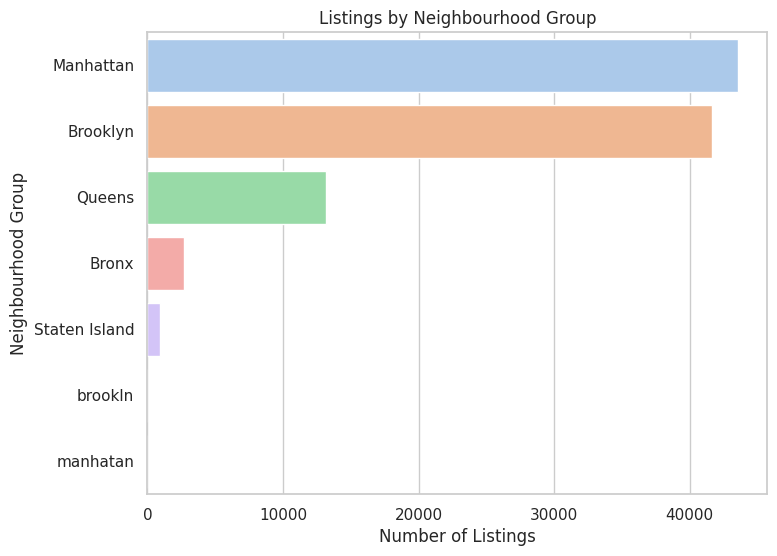

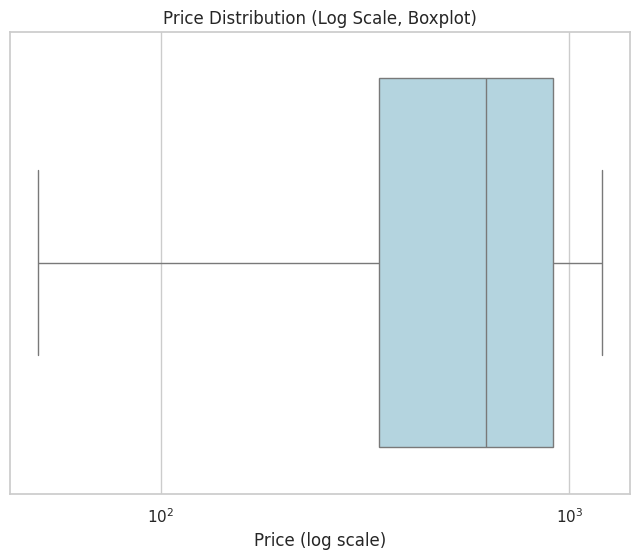

/tmp/ipython-input-3499213843.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['availability 365'].dropna(), shade=True, color='purple')


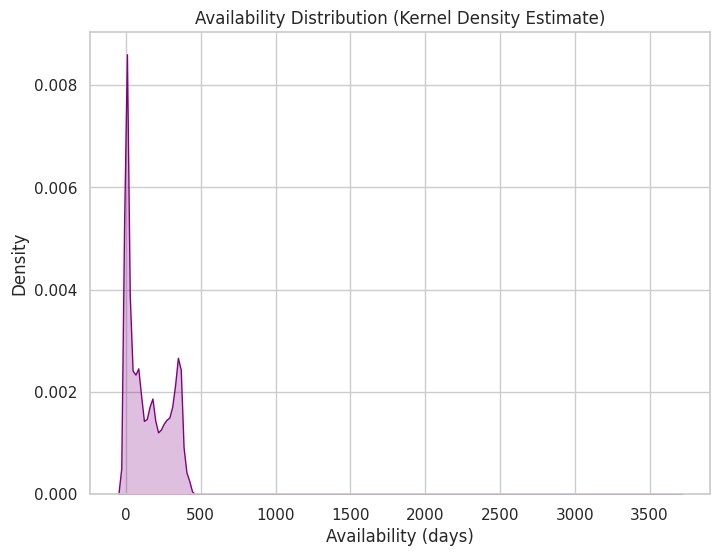

In [17]:
# Plot 1: Listings by Neighbourhood Group (Horizontal Barplot with 'pastel' palette)
plt.figure(figsize=(8,6))
neighbourhood_counts = df['neighbourhood group'].value_counts().reset_index()
neighbourhood_counts.columns = ['neighbourhood group', 'count']
sns.barplot(y='neighbourhood group', x='count', data=neighbourhood_counts, palette='pastel')
plt.title("Listings by Neighbourhood Group")
plt.xlabel("Number of Listings")
plt.ylabel("Neighbourhood Group")
plt.show()
# Plot 2: Price Distribution (Boxplot with 'coolwarm' palette, log scale)
plt.figure(figsize=(8,6))
sns.boxplot(x='price', data=df[df['price'] > 0], color='lightblue')
plt.xscale('log')
plt.title("Price Distribution (Log Scale, Boxplot)")
plt.xlabel("Price (log scale)")
plt.show()
# Plot 3: Availability Distribution (KDE Plot with 'magma' palette)
plt.figure(figsize=(8,6))
sns.kdeplot(df['availability 365'].dropna(), shade=True, color='purple')
plt.title("Availability Distribution (Kernel Density Estimate)")
plt.xlabel("Availability (days)")
plt.ylabel("Density")
plt.show()

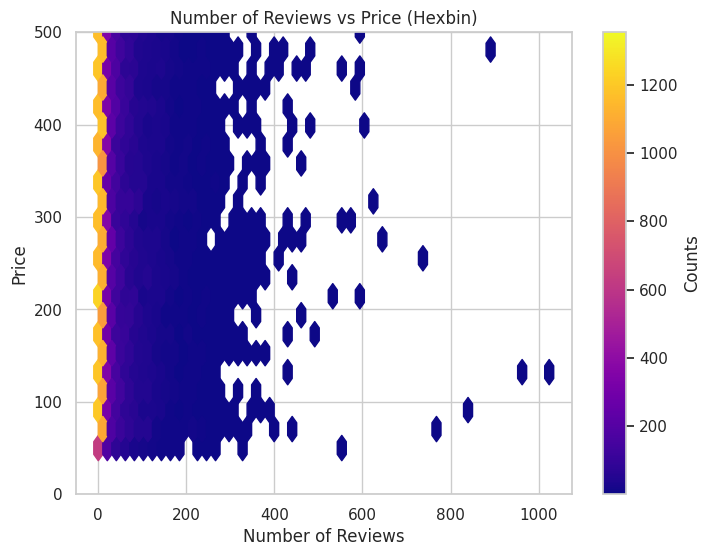

In [18]:
plt.figure(figsize=(8,6))
plt.hexbin(df['number of reviews'], df['price'], gridsize=50, cmap='plasma', mincnt=1)
plt.colorbar(label='Counts')
plt.ylim(0, 500)
plt.title("Number of Reviews vs Price (Hexbin)")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()


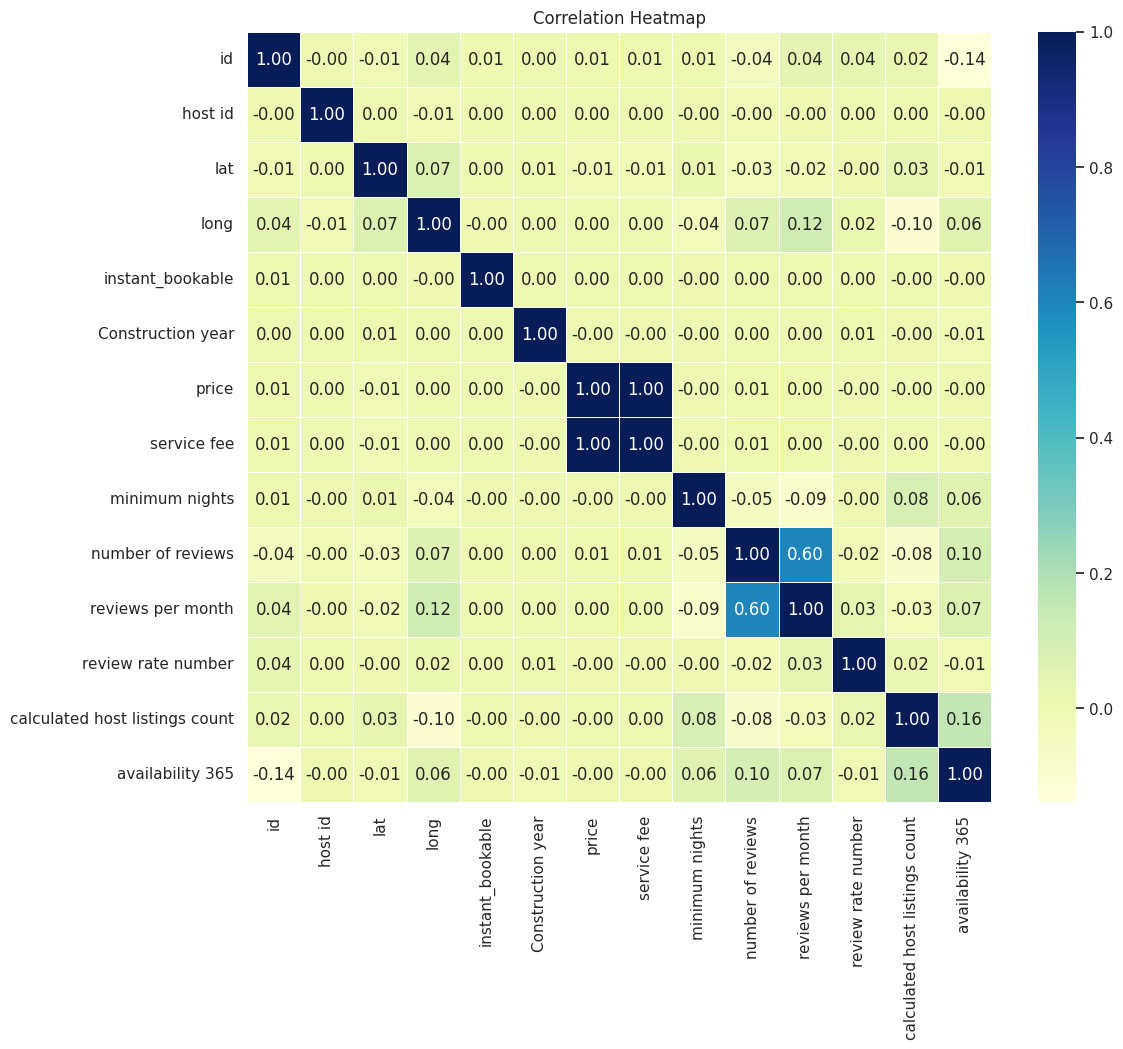

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
